In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
from data_utils import read_mtx
from graph_utils import plot_graph, graph_info, get_modularity, plot_degree_distribution, highlight_nodes
import networkx as nx
from matplotlib import pyplot as plt
from scipy.spatial import distance
from scipy.cluster import hierarchy
import numpy as np

In [3]:
g = read_mtx('bio-celegans.mtx')

In [6]:
graph_info(g);

Num nodes:  453
Num edges:  2024
Avg degree:  8.936
Clustering coef:  0.646


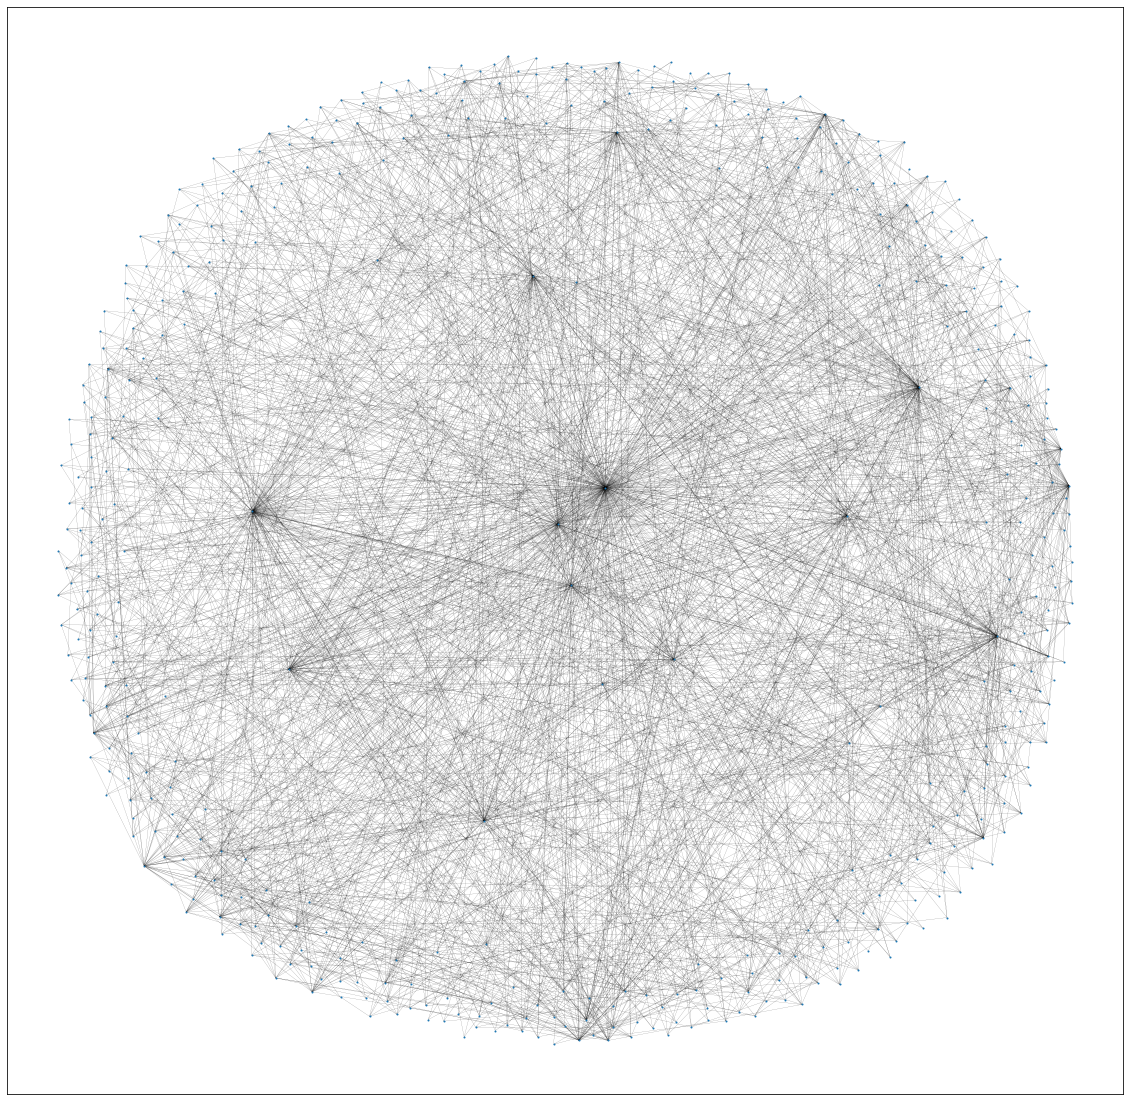

In [34]:
plot_graph(g)

In [8]:
import networkx.algorithms.community as nx_comm

In [48]:
get_modularity(G, nx_comm.label_propagation_communities(G))

0.050952795700604646

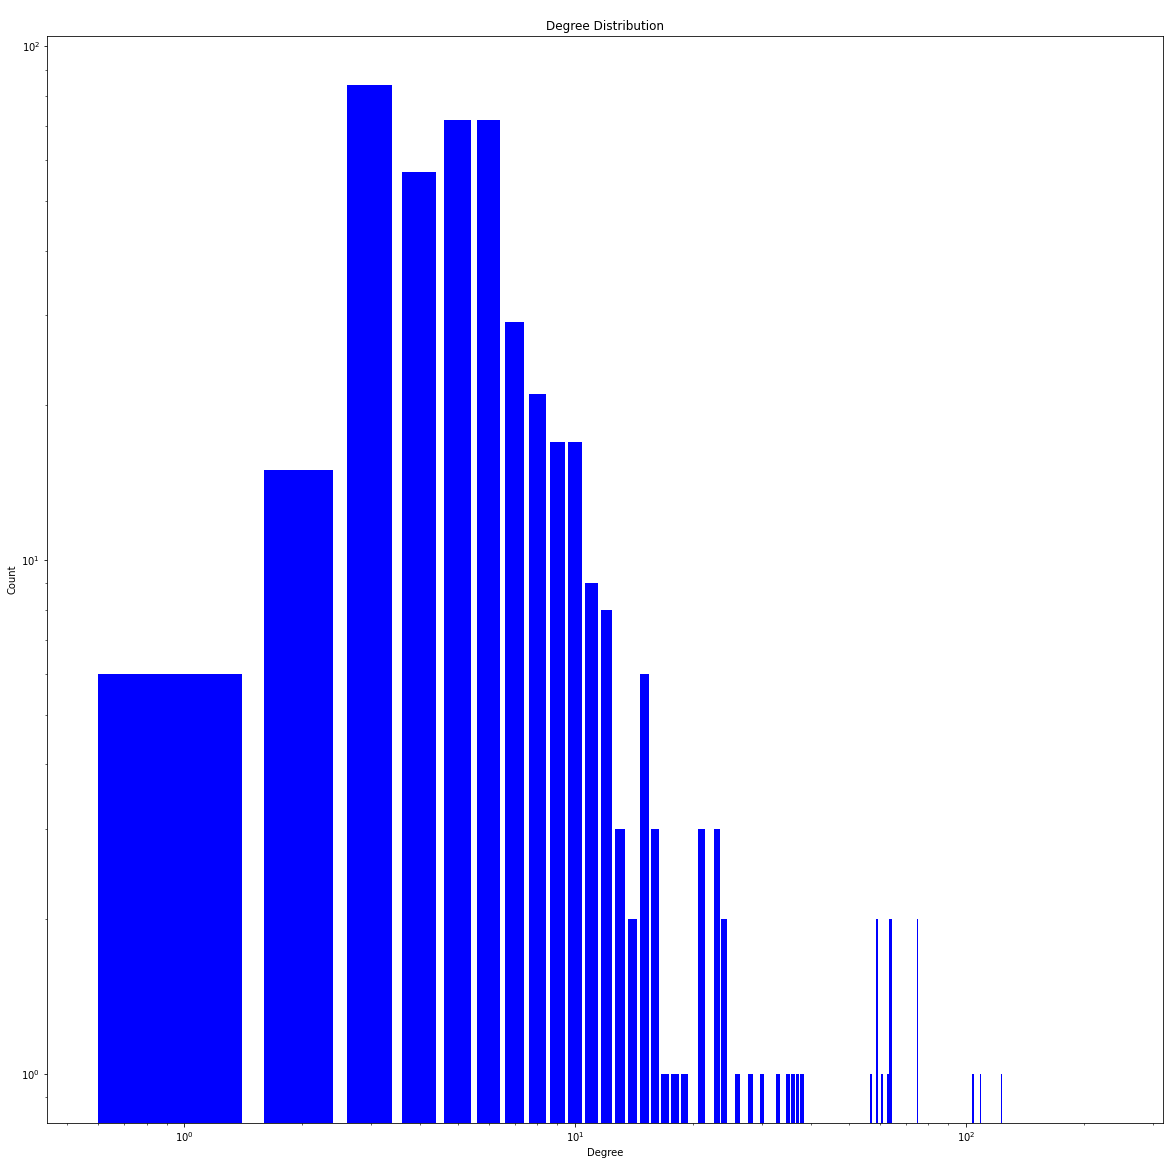

In [50]:
plot_degree_distribution(g)

In [8]:
x = list(nx.all_pairs_shortest_path_length(g))

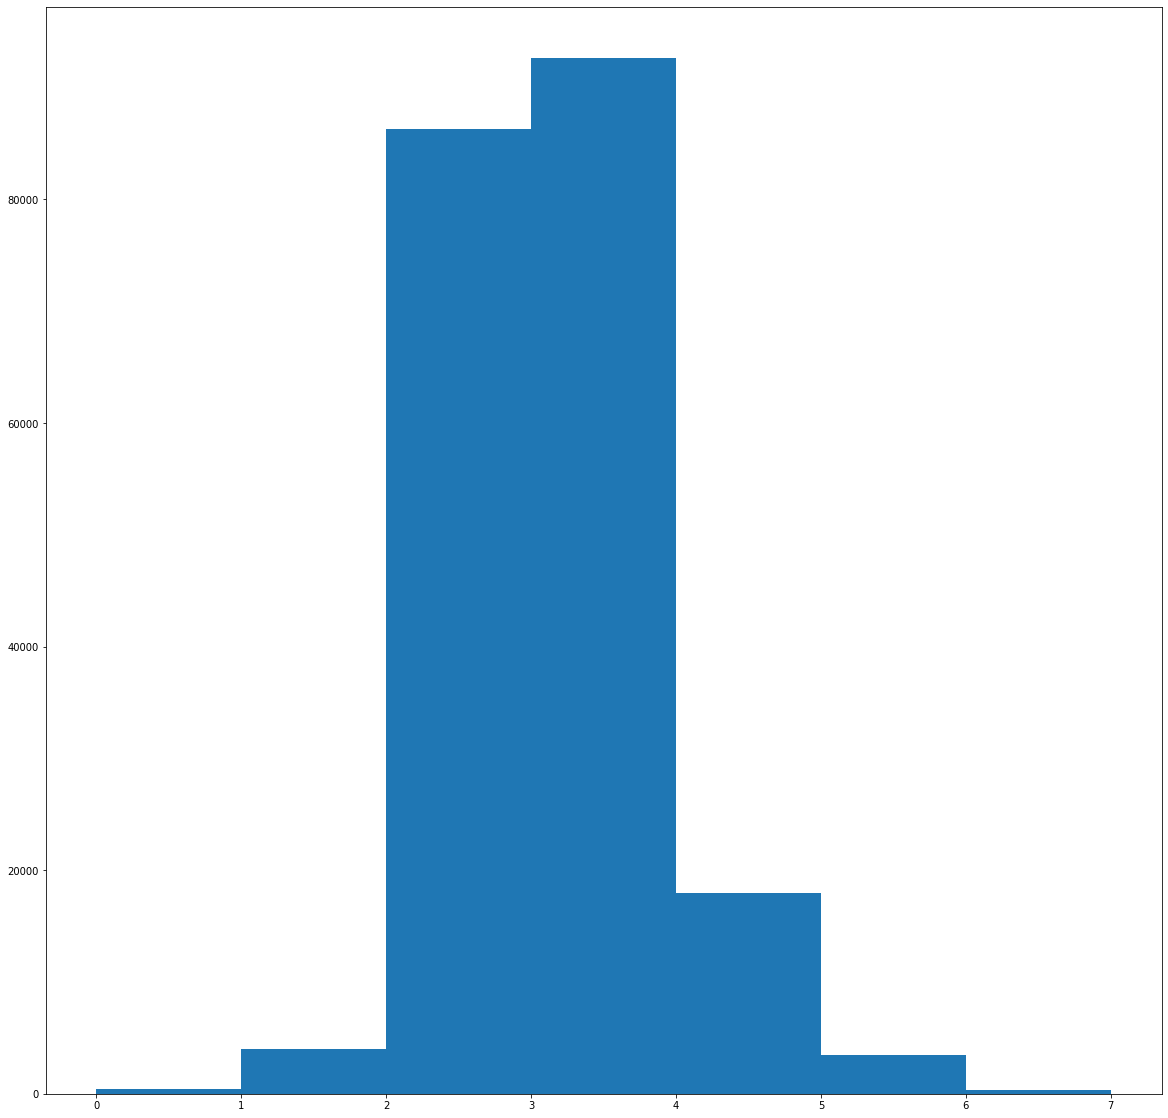

In [37]:
plt.hist([v for _,a in x for v in a.values()], bins=7);

In [14]:
max(((k,k2,v2) for k,v in x for k2,v2 in v.items()), key=lambda x:x[2])

('15', '138', 7)

In [34]:
highlight_nodes(g, ['15', '138'], k=2)

In [42]:
from collections import defaultdict

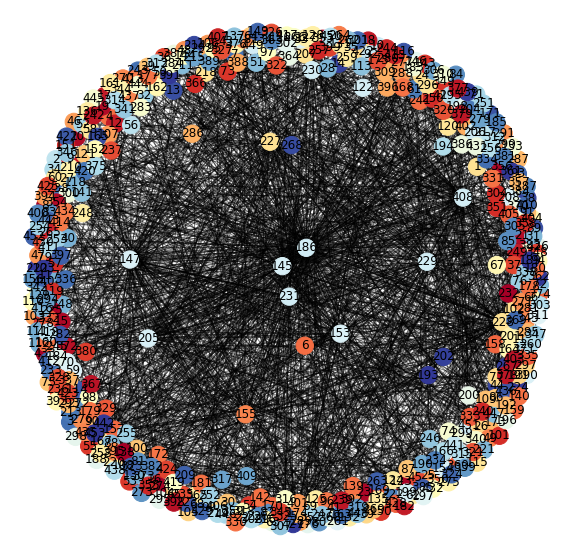

In [98]:
G=g
t=

pos = nx.spring_layout(g, k=2, seed=0)

# ## Set-up the distance matrix D
# labels=list(G.nodes())   # keep node labels
# path_length=nx.all_pairs_shortest_path_length(G)
    
# distances=np.zeros((len(G),len(G)))   
# for u,p in path_length:
#     for v,d in p.items():
#         distances[list(G.nodes()).index(u)][list(G.nodes()).index(v)] = d
#         distances[list(G.nodes()).index(v)][list(G.nodes()).index(u)] = d
#         if u==v: distances[list(G.nodes()).index(u)][list(G.nodes()).index(u)]=0

# # Create hierarchical cluster (HC)
# # There are various other routines for agglomerative clustering, 
# # but here we create the HCs using the complete/max/farthest point linkage 
# Y = distance.squareform(distances) ## the upper triangular of the distance matrix 
# Z = hierarchy.average(Y)

# This partition selection (t) is arbitrary, for illustrive purposes
membership=list(hierarchy.fcluster(Z,t=t))

# Create collection of lists for blockmodel
partition = defaultdict(list)
for n,p in zip(list(range(len(G))),membership):
    partition[p].append(labels[n])
    
    
partition = {}
i = 0
for i in range(len(membership)):
    partition[i]=membership[i]

plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx_nodes(g, pos, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
nx.draw_networkx_labels(g, pos)
plt.show()

# Z, membership, partition

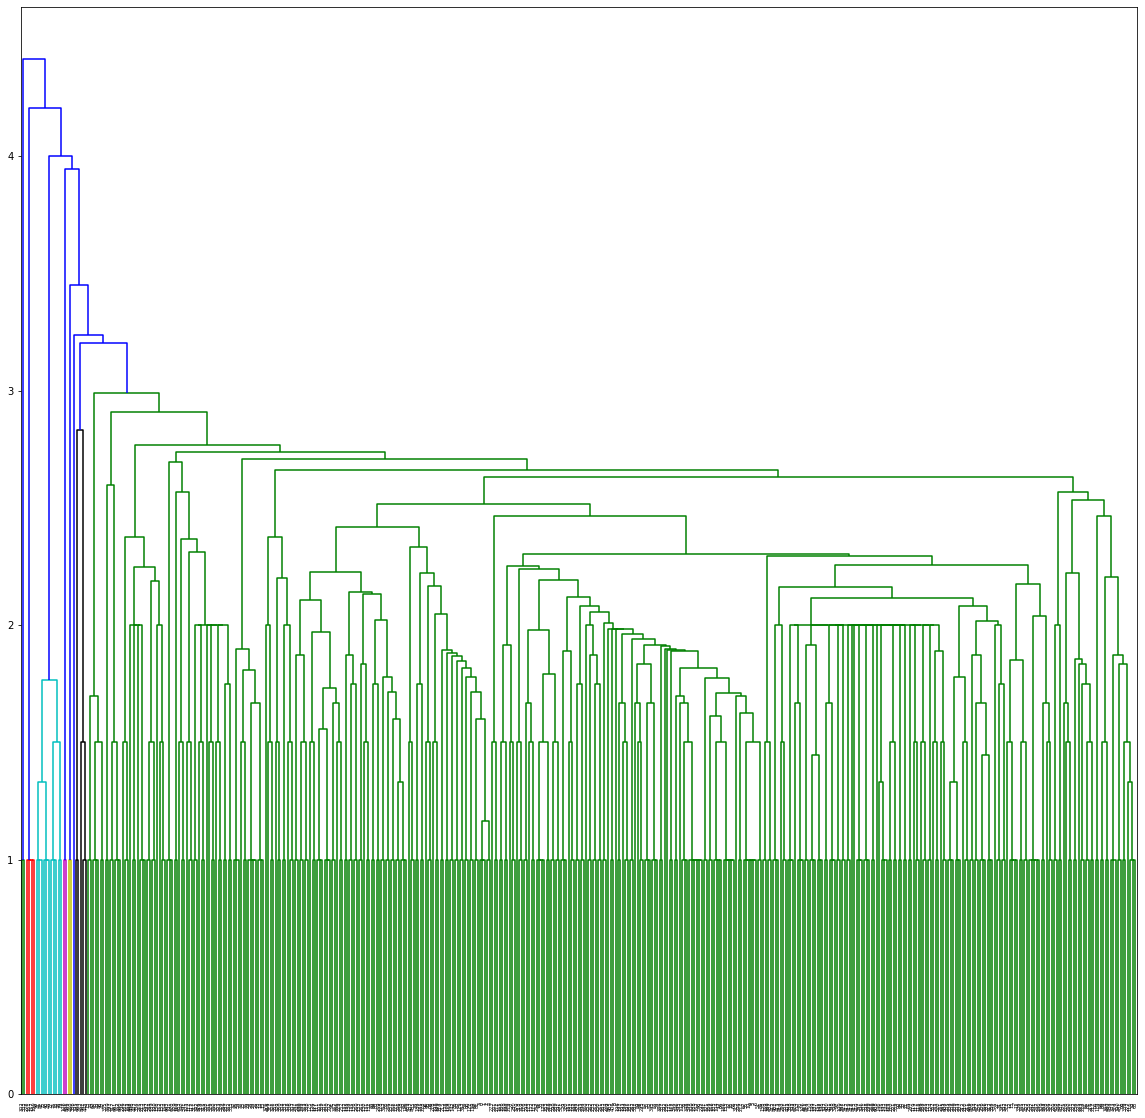

In [99]:
hierarchy.dendrogram(Z)
plt.show()